In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import imblearn
from imblearn.under_sampling import NearMiss

In [2]:
plt.rcParams['figure.figsize'] = (12,8)

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [4]:
df = pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,0.000,0,0
1,1,PAYMENT,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,0.000,0,0
2,1,TRANSFER,181.000,C1305486145,181.000,0.000,C553264065,0.000,0.000,1,0
3,1,CASH_OUT,181.000,C840083671,181.000,0.000,C38997010,21182.000,0.000,1,0
4,1,PAYMENT,11668.140,C2048537720,41554.000,29885.860,M1230701703,0.000,0.000,0,0


In [5]:
df.shape


(6362620, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.000,6362620.000,6362620.000,6362620.000,6362620.000,6362620.000,6362620.000,6362620.000
mean,243.397,179861.904,833883.104,855113.669,1100701.667,1224996.398,0.001,0.000
std,142.332,603858.231,2888242.673,2924048.503,3399180.113,3674128.942,0.036,0.002
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,156.000,13389.570,0.000,0.000,0.000,0.000,0.000,0.000
50%,239.000,74871.940,14208.000,0.000,132705.665,214661.440,0.000,0.000
75%,335.000,208721.478,107315.175,144258.410,943036.708,1111909.250,0.000,0.000
max,743.000,92445516.640,59585040.370,49585040.370,356015889.350,356179278.920,1.000,1.000


In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [10]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000,0.022,-0.010,-0.010,0.028,0.026,0.032,0.003
amount,0.022,1.000,-0.003,-0.008,0.294,0.459,0.077,0.012
oldbalanceOrg,-0.010,-0.003,1.000,0.999,0.066,0.042,0.010,0.004
newbalanceOrig,-0.010,-0.008,0.999,1.000,0.068,0.042,-0.008,0.004
oldbalanceDest,0.028,0.294,0.066,0.068,1.000,0.977,-0.006,-0.001
newbalanceDest,0.026,0.459,0.042,0.042,0.977,1.000,0.001,-0.001
isFraud,0.032,0.077,0.010,-0.008,-0.006,0.001,1.000,0.044
isFlaggedFraud,0.003,0.012,0.004,0.004,-0.001,-0.001,0.044,1.000


In [11]:
df.drop(columns=['nameOrig','nameDest'],inplace=True)

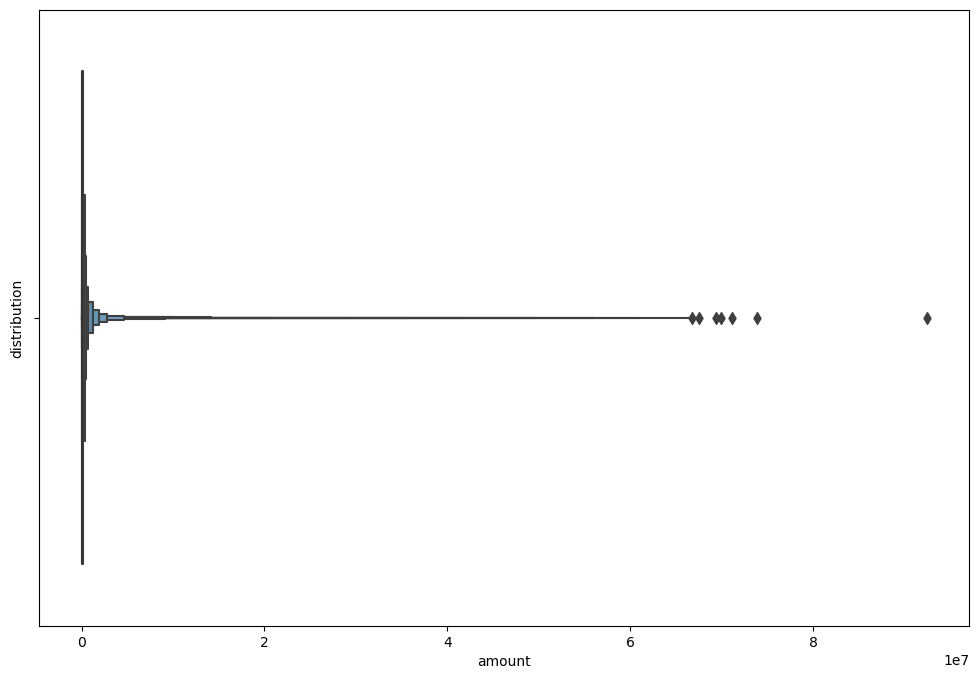

In [12]:
sns.boxenplot(df['amount'])
plt.ylabel('distribution')
plt.show()

Text(0, 0.5, 'distribution')

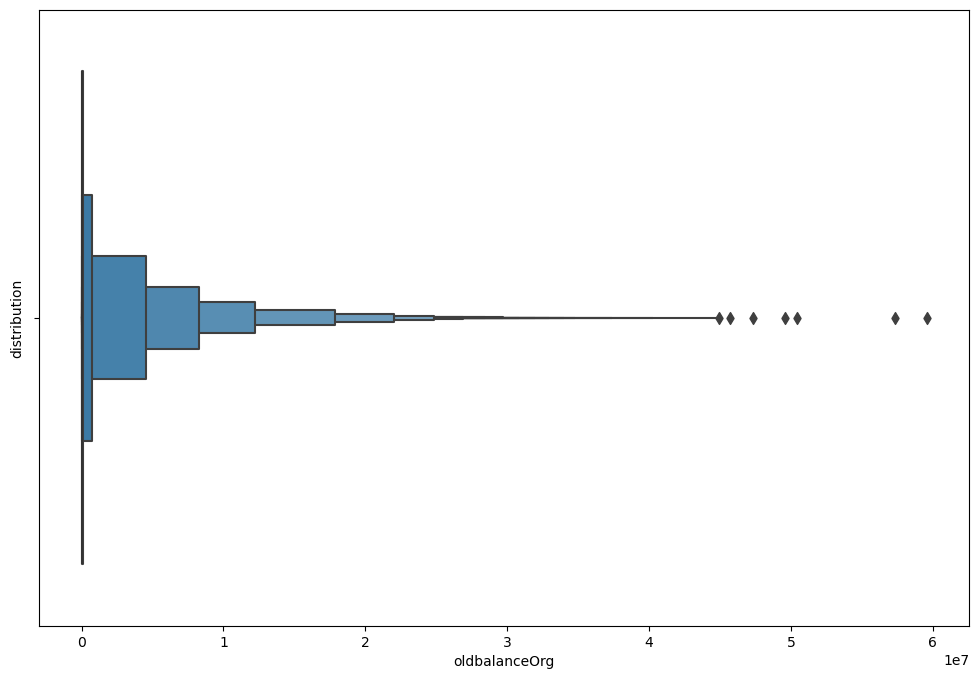

In [13]:
sns.boxenplot(df['oldbalanceOrg'])
plt.ylabel('distribution')

Text(0, 0.5, 'distribution')

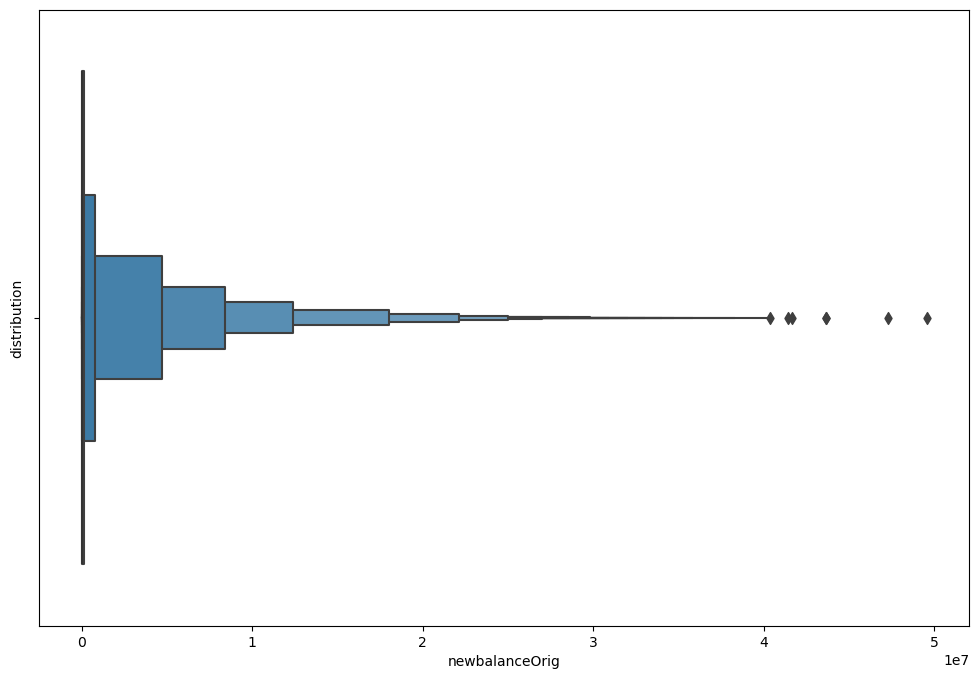

In [14]:
sns.boxenplot(df['newbalanceOrig'])
plt.ylabel('distribution')

Text(0, 0.5, 'distribution')

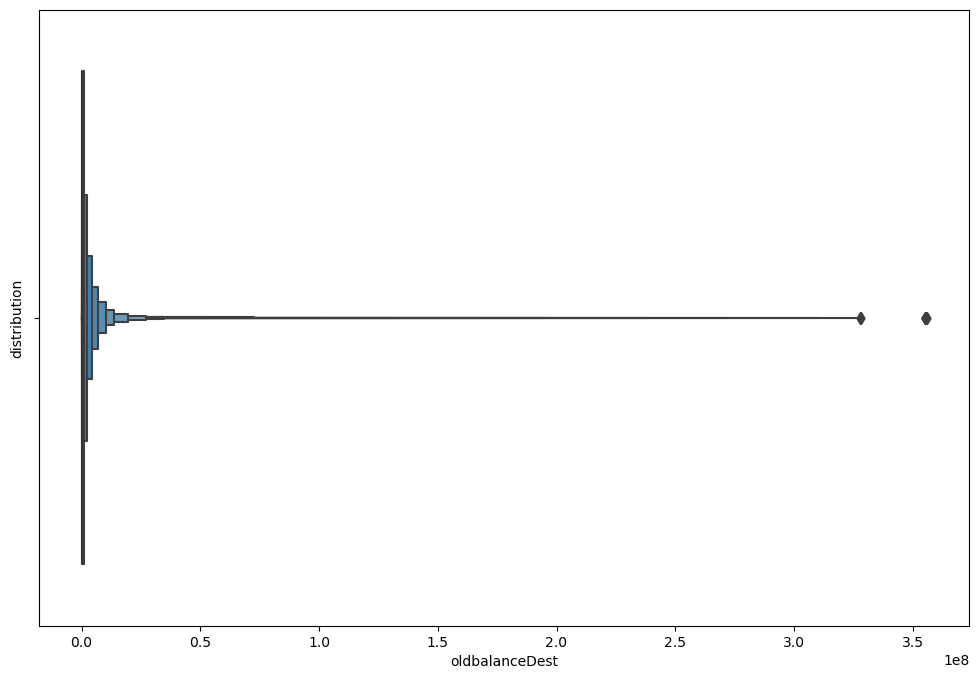

In [15]:
sns.boxenplot(df['oldbalanceDest'])
plt.ylabel('distribution')

Text(0, 0.5, 'distribution')

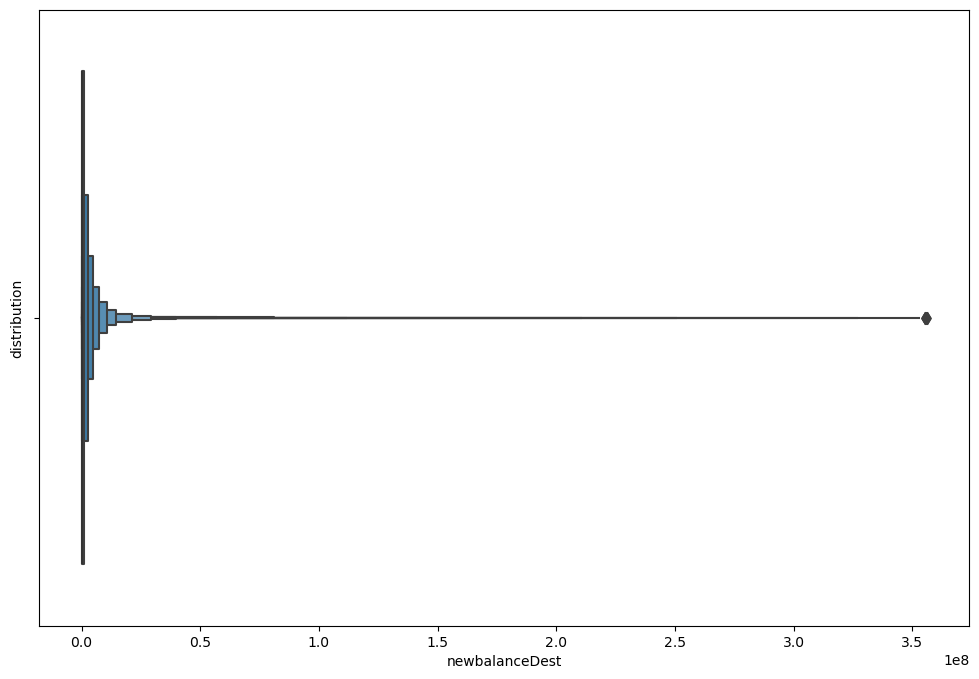

In [16]:
sns.boxenplot(df['newbalanceDest'])
plt.ylabel('distribution')

In [17]:
def remove_outliers(df,col):
    lower_quantile = df[col].quantile(0.25)
    upper_quantile = df[col].quantile(0.75)
    IQR = upper_quantile - lower_quantile
    lower_whisker = lower_quantile - 1.5 * IQR
    upper_whisker = upper_quantile + 1.5 * IQR
    temp = df.loc[(df[col]>lower_whisker)&(df[col]<upper_whisker)]
    return temp[col]

In [18]:
df['amount'] = remove_outliers(df,'amount')
df['oldbalanceOrg'] = remove_outliers(df,'oldbalanceOrg')
df['newbalanceOrig'] = remove_outliers(df,'newbalanceOrig')
df['oldbalanceDest'] = remove_outliers(df,'oldbalanceDest')
df['newbalanceDest'] = remove_outliers(df,'newbalanceDest')

<AxesSubplot:>

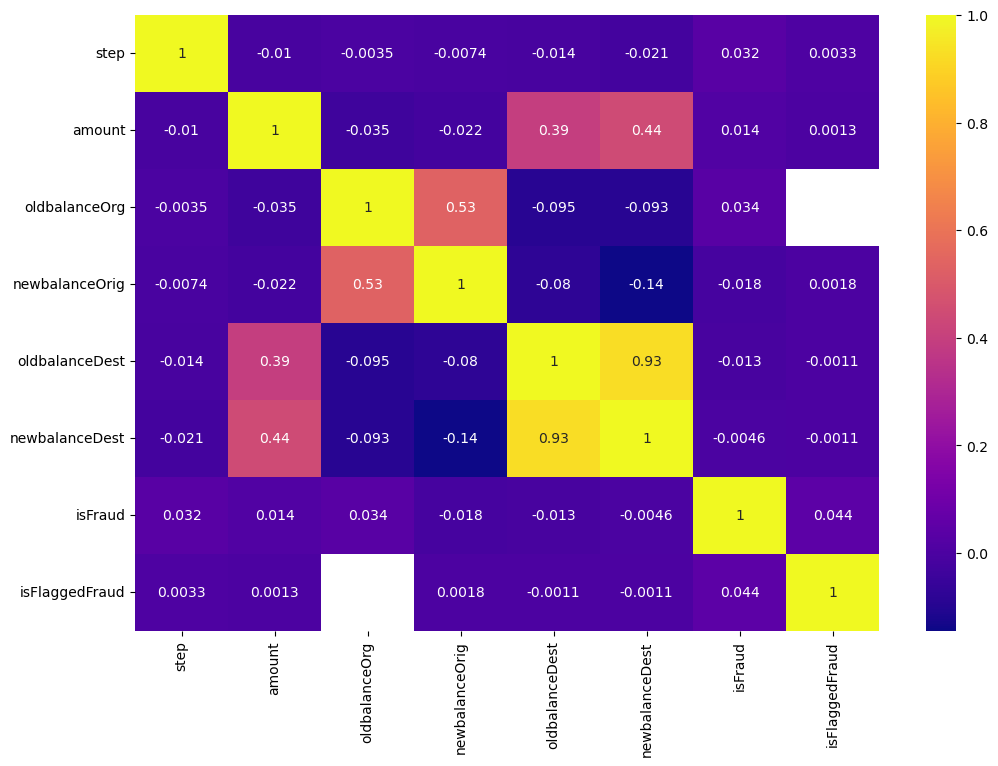

In [19]:
sns.heatmap(df.corr(),annot=True,cmap='plasma')

In [20]:
df.groupby('isFraud').describe().T

isFraud                        0           1
step           count 6354407.000    8213.000
               mean      243.236     368.414
               std       142.140     216.389
               min         1.000       1.000
               25%       156.000     181.000
               50%       239.000     367.000
               75%       334.000     558.000
               max       718.000     743.000
amount         count 6020183.000    4359.000
               mean   111488.796  174214.225
               std    120371.544  139527.583
               min         0.010       0.000
               25%     12359.360   54584.000
               50%     63111.400  139210.230
               75%    182870.775  272791.440
               max    501718.410  501496.310
oldbalanceOrg  count 5246866.000    3247.000
               mean    30618.674  103543.102
               std     53226.540   76607.585
               min         0.000       0.000
               25%         0.000   36300.250
               50%      4214.000   90346.050
               75%     35239.000  161670.615
               max    268287.750  268230.430
newbalanceOrig count 5301171.000    8058.000
               mean    34823.724     169.722
               std     75455.363    7087.570
               min         0.000       0.000
               25%         0.000       0.000
               50%         0.000       0.000
               75%     19689.500       0.000
               max    360645.590  353874.220
oldbalanceDest count 5568738.000    7747.000
               mean   352944.602  159770.036
               std    550248.210  395884.933
               min         0.000       0.000
               25%         0.000       0.000
               50%     19297.910       0.000
               75%    510295.938   68105.975
               max   2357589.180 2350433.080
newbalanceDest count 5616979.000    7114.000
               mean   444017.050  359668.220
               std    652211.824  633851.852
               min         0.000       0.000
               25%         0.000       0.000
               50%    107954.330       0.000
               75%    658917.085  465473.863
               max   2779767.650 2776135.330
isFlaggedFraud count 6354407.000    8213.000
               mean        0.000       0.002
               std         0.000       0.044
               min         0.000       0.000
               25%         0.000       0.000
               50%         0.000       0.000
               75%         0.000       0.000
               max         0.000       1.000

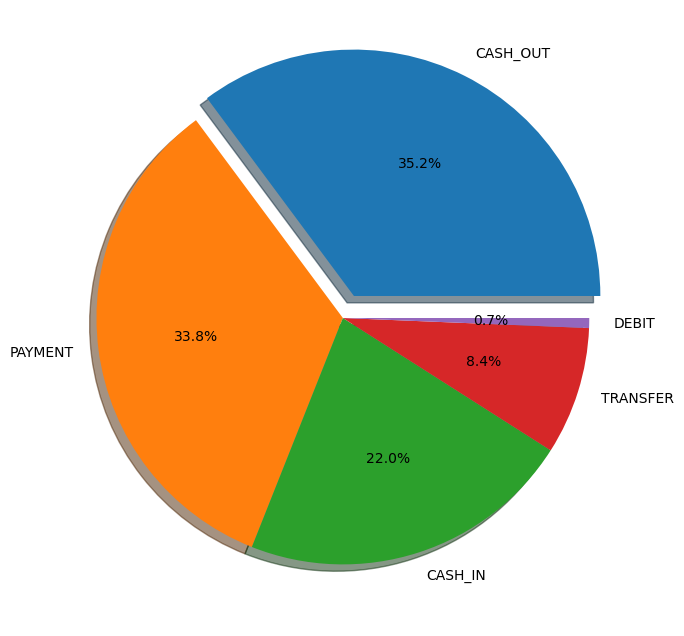

In [21]:
values = df['type'].value_counts().values
labels = df['type'].value_counts().keys()
explode = (0.1,0,0,0,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.show()

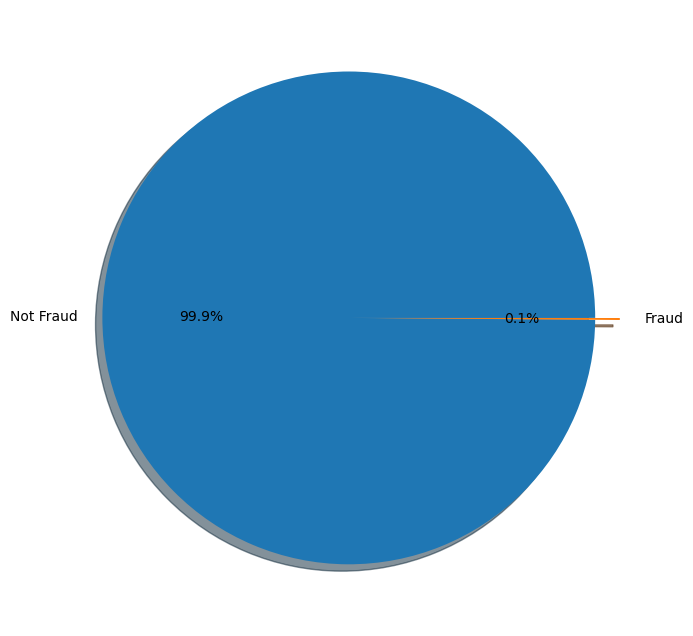

In [22]:
values = df['isFraud'].value_counts().values
labels = ['Not Fraud','Fraud']
explode = (0.1,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.show()

In [23]:
max_amount_type = df.groupby('type')['amount'].max().sort_values(ascending=False).reset_index()[:10]
max_amount_type

,type,amount
0,CASH_OUT,501718.410
1,CASH_IN,501718.020
2,TRANSFER,501709.630
3,DEBIT,417825.070
4,PAYMENT,238637.980


<AxesSubplot:xlabel='type', ylabel='amount'>

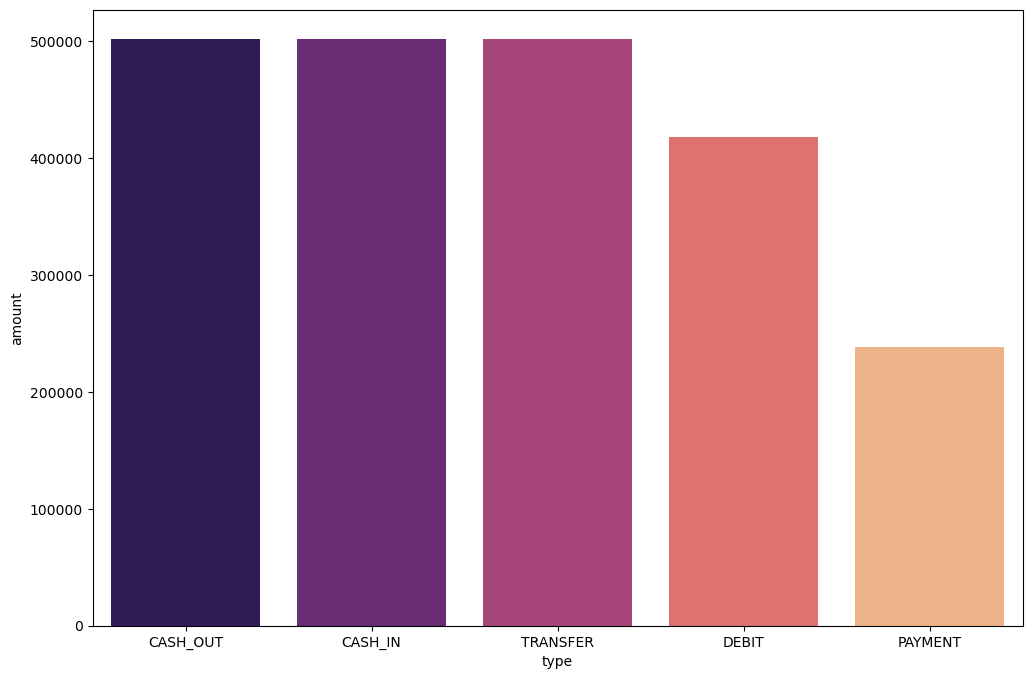

In [24]:
sns.barplot(x='type',y='amount',data=max_amount_type,palette='magma')

<AxesSubplot:xlabel='isFraud', ylabel='count'>

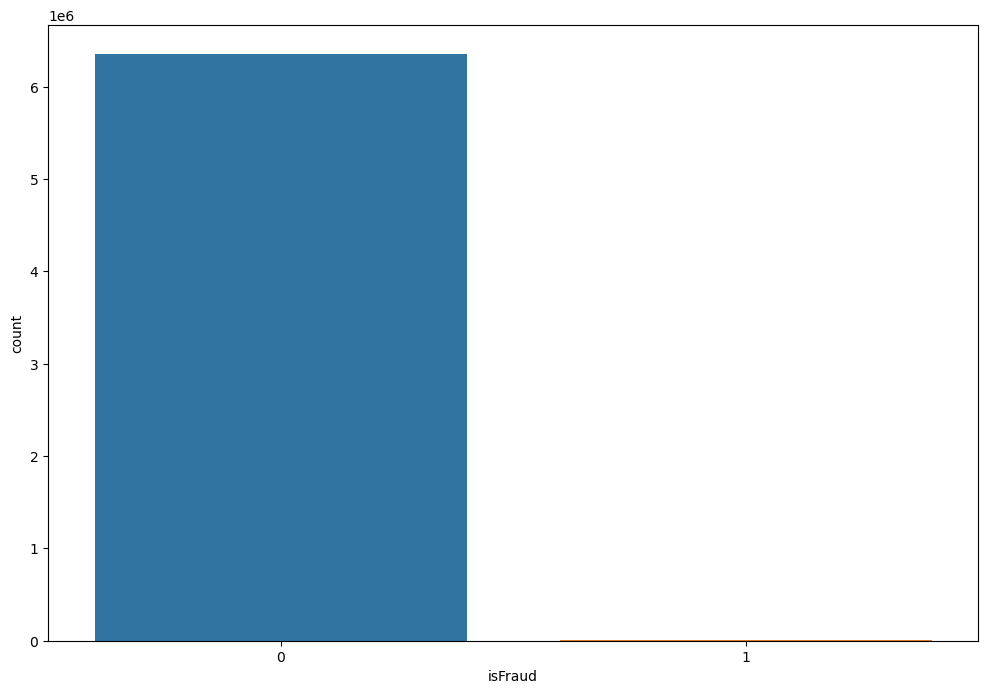

In [25]:
sns.countplot(df['isFraud'])

<AxesSubplot:xlabel='amount', ylabel='Density'>

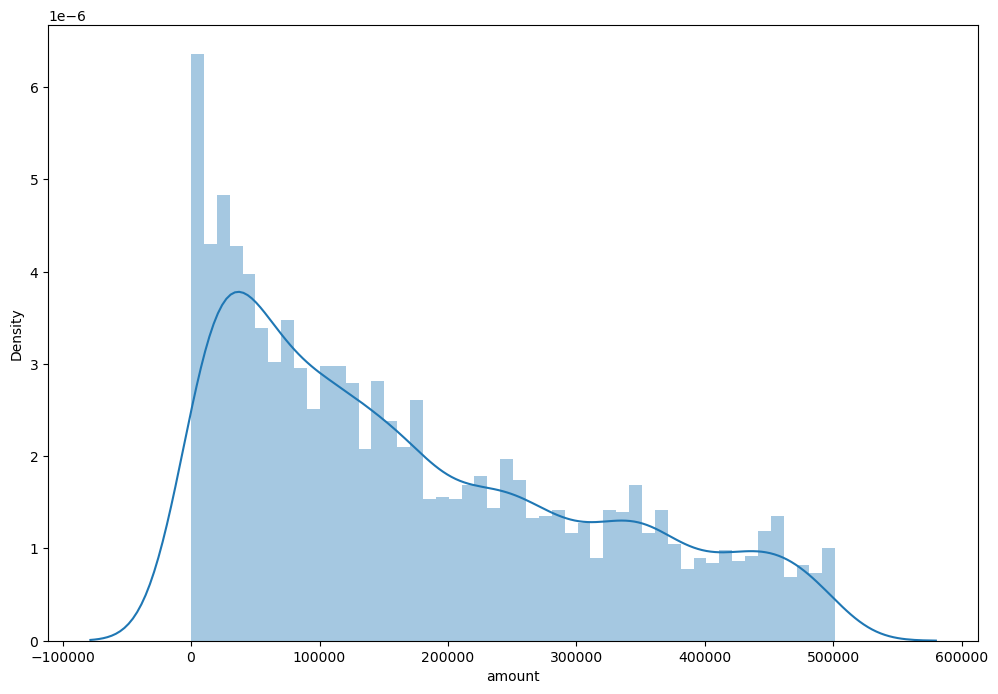

In [26]:
positive_fraud_case = df[df['isFraud']==1]
sns.distplot(positive_fraud_case['amount'],bins=50)

<AxesSubplot:xlabel='amount', ylabel='Density'>

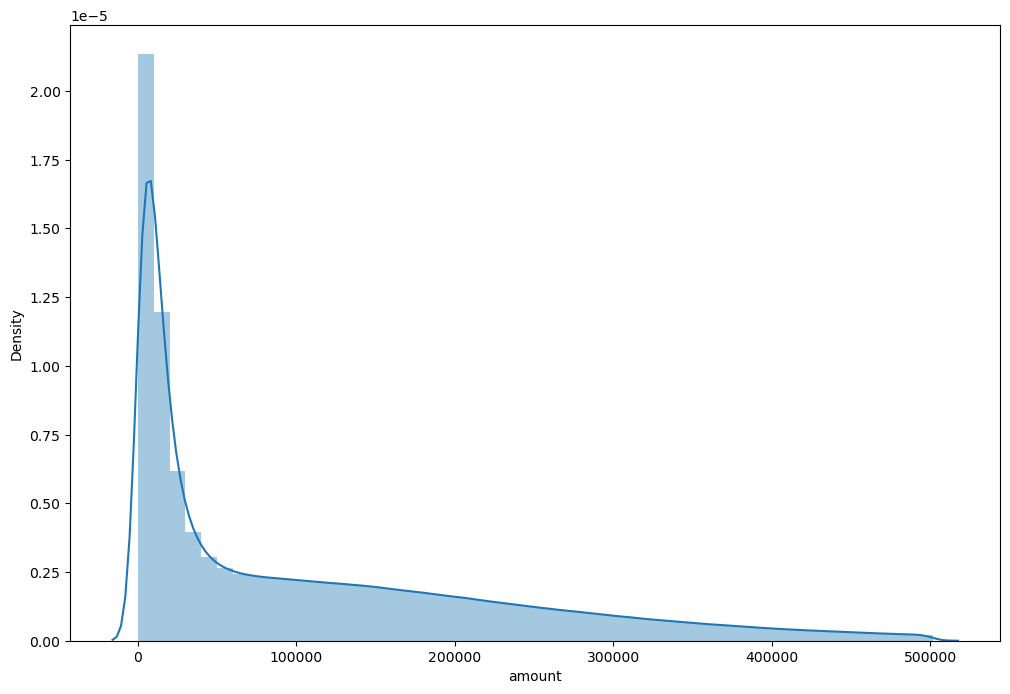

In [27]:
non_fraud_case = df[df['isFraud']==0]
sns.distplot(non_fraud_case['amount'],bins=50)

<AxesSubplot:xlabel='oldbalanceDest', ylabel='newbalanceDest'>

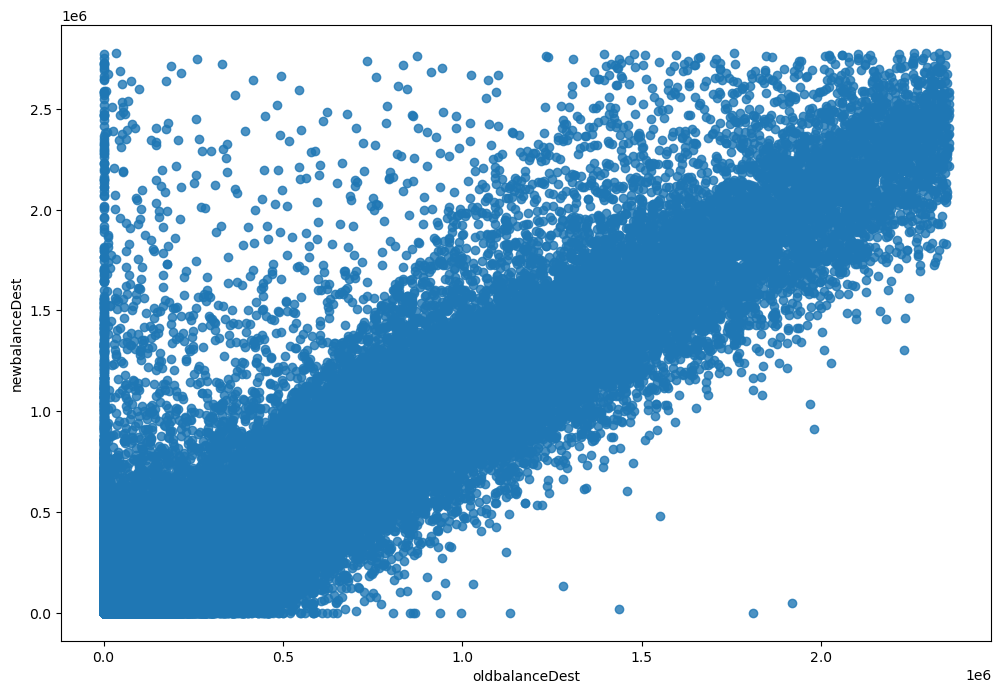

In [28]:
sns.regplot(x='oldbalanceDest',y='newbalanceDest',data=df.sample(100000))

In [29]:
df['amount'].fillna(df['amount'].mean(),inplace=True)
df['oldbalanceOrg'].fillna(df['oldbalanceOrg'].mean(),inplace=True)
df['newbalanceOrig'].fillna(df['newbalanceOrig'].mean(),inplace=True)
df['oldbalanceDest'].fillna(df['oldbalanceDest'].mean(),inplace=True)
df['newbalanceDest'].fillna(df['newbalanceDest'].mean(),inplace=True)

In [30]:
payment_types = pd.get_dummies(df['type'],prefix='type',drop_first=True)
df = pd.concat([df,payment_types],axis=1)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.640,170136.000,160296.360,0.000,0.000,0,0,0,0,1,0
1,1,PAYMENT,1864.280,21249.000,19384.720,0.000,0.000,0,0,0,0,1,0
2,1,TRANSFER,181.000,181.000,0.000,0.000,0.000,1,0,0,0,0,1
3,1,CASH_OUT,181.000,181.000,0.000,21182.000,0.000,1,0,1,0,0,0
4,1,PAYMENT,11668.140,41554.000,29885.860,0.000,0.000,0,0,0,0,1,0


In [31]:
df.drop('type',axis=1,inplace=True)

In [32]:
df['type_CASH_OUT'] = df['type_CASH_OUT'].astype(np.int64)
df['type_DEBIT'] = df['type_DEBIT'].astype(np.int64)
df['type_PAYMENT'] = df['type_PAYMENT'].astype(np.int64)
df['type_TRANSFER'] = df['type_TRANSFER'].astype(np.int64)

In [33]:
x = df.drop('isFraud',axis=1)
y = df['isFraud']

In [34]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_nm, y_nm = nm.fit_resample(x,y)


In [35]:
X = x_nm
y = y_nm
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,stratify=y,random_state=2022)

In [36]:
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

In [37]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
print('ROC AUC Score:',roc_auc_score(y_test,lr_pred))
print('F1 Score:',f1_score(y_test,lr_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,lr_pred))
print('Classification Report:\n',classification_report(y_test,lr_pred))
print('Accuracy Score:',accuracy_score(y_test,lr_pred))

ROC AUC Score: 0.9219130434782609
F1 Score: 0.9212971078001753
Confusion Matrix:
 [[2673  202]
 [ 247 2628]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      2875
           1       0.93      0.91      0.92      2875

    accuracy                           0.92      5750
   macro avg       0.92      0.92      0.92      5750
weighted avg       0.92      0.92      0.92      5750

Accuracy Score: 0.9219130434782609


In [39]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [41]:
print("Confusion Matrix:\n",confusion_matrix(y_test,rfc_pred))
print("Classification Report:\n",classification_report(y_test,rfc_pred))
print("ROC AUC Score:",roc_auc_score(y_test,rfc_pred))
print("F1 Score:",f1_score(y_test,rfc_pred))
print('Accuracy Score:',accuracy_score(y_test,rfc_pred))

Confusion Matrix:
 [[2743  132]
 [   4 2871]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98      2875
           1       0.96      1.00      0.98      2875

    accuracy                           0.98      5750
   macro avg       0.98      0.98      0.98      5750
weighted avg       0.98      0.98      0.98      5750

ROC AUC Score: 0.9763478260869566
F1 Score: 0.9768628785301123
Accuracy Score: 0.9763478260869565


In [42]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
dtree_pred = dtree.predict(X_test)
dtree_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [44]:
print("ROC AUC Score:",roc_auc_score(y_test,dtree_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,dtree_pred))
print("F1 Score:",f1_score(y_test,dtree_pred))
print("Classification Report:\n",classification_report(y_test,dtree_pred))
print("Accuracy Score:",accuracy_score(y_test,dtree_pred))

ROC AUC Score: 0.9765217391304347
Confusion Matrix:
 [[2743  132]
 [   3 2872]]
F1 Score: 0.9770369110392924
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98      2875
           1       0.96      1.00      0.98      2875

    accuracy                           0.98      5750
   macro avg       0.98      0.98      0.98      5750
weighted avg       0.98      0.98      0.98      5750

Accuracy Score: 0.9765217391304348


In [45]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [46]:
gnb_pred = gnb.predict(X_test)
gnb_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [47]:
print("ROC AUC Score:",roc_auc_score(y_test,gnb_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,gnb_pred))
print("F1 Score:",f1_score(y_test,gnb_pred))
print("Classification Report:\n",classification_report(y_test,gnb_pred))
print("Accuracy Score:",accuracy_score(y_test,gnb_pred))

ROC AUC Score: 0.8478260869565217
Confusion Matrix:
 [[2599  276]
 [ 599 2276]]
F1 Score: 0.8387691173760826
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.86      2875
           1       0.89      0.79      0.84      2875

    accuracy                           0.85      5750
   macro avg       0.85      0.85      0.85      5750
weighted avg       0.85      0.85      0.85      5750

Accuracy Score: 0.8478260869565217


In [50]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [51]:
knn_pred = knn.predict(X_test)
knn_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
print("ROC AUC Score:",roc_auc_score(y_test,knn_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,knn_pred))
print("F1 Score:",f1_score(y_test,knn_pred))
print("Classification Report:\n",classification_report(y_test,knn_pred))
print("Accuracy Score:",accuracy_score(y_test,knn_pred))

ROC AUC Score: 0.9914782608695653
Confusion Matrix:
 [[2856   19]
 [  30 2845]]
F1 Score: 0.9914619271650114
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2875
           1       0.99      0.99      0.99      2875

    accuracy                           0.99      5750
   macro avg       0.99      0.99      0.99      5750
weighted avg       0.99      0.99      0.99      5750

Accuracy Score: 0.9914782608695653


In [53]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [54]:
svm_pred = svm.predict(X_test)
svm_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [55]:
print("ROC AUC Score:",roc_auc_score(y_test,svm_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,svm_pred))
print("F1 Score:",f1_score(y_test,svm_pred))
print("Classification Report:\n",classification_report(y_test,svm_pred))
print("Accuracy Score:",accuracy_score(y_test,svm_pred))

ROC AUC Score: 0.9761739130434782
Confusion Matrix:
 [[2743  132]
 [   5 2870]]
F1 Score: 0.9766887867959844
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98      2875
           1       0.96      1.00      0.98      2875

    accuracy                           0.98      5750
   macro avg       0.98      0.98      0.98      5750
weighted avg       0.98      0.98      0.98      5750

Accuracy Score: 0.9761739130434782


In [56]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [57]:
xgb_pred = xgb.predict(X_test)
xgb_pred

array([1, 0, 1, ..., 0, 0, 0])

In [58]:
print("ROC AUC Score:",roc_auc_score(y_test,xgb_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,xgb_pred))
print("F1 Score:",f1_score(y_test,xgb_pred))
print("Classification Report:\n",classification_report(y_test,xgb_pred))
print("Accuracy Score:",accuracy_score(y_test,xgb_pred))

ROC AUC Score: 0.976
Confusion Matrix:
 [[2743  132]
 [   6 2869]]
F1 Score: 0.9765146358066713
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98      2875
           1       0.96      1.00      0.98      2875

    accuracy                           0.98      5750
   macro avg       0.98      0.98      0.98      5750
weighted avg       0.98      0.98      0.98      5750

Accuracy Score: 0.976


In [ ]:
#K Nearest Neighbors Classifier is the best performing
# model with a prediction accuracy of a little more than 99%.